# 1. 합성곱 신경망 (CNN) - CIFAR10

In [1]:
from tensorflow import keras

In [2]:
(train_images, train_targets), (test_images, test_targets) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
import numpy as np
np.unique(train_targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
train_targets

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

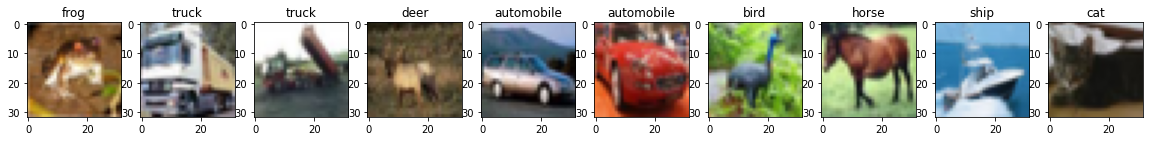

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(train_images[i])
  plt.title(class_names[train_targets[i][0]])
plt.show()

In [8]:
train_scaled = train_images / 255.0
test_scaled = test_images / 255.0

In [9]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_targets, test_size=0.2, random_state=0)

In [28]:
from keras import models, layers

def make_cnn_model():
  model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  
  return model

In [29]:
cnn_model = make_cnn_model()
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [30]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = cnn_model.fit(train_scaled, train_target, epochs=30, 
                        validation_data=(val_scaled, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6953 - accuracy: 0.3773 - val_loss: 1.2793 - val_accuracy: 0.5384
Epoch 2/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3013 - accuracy: 0.5348 - val_loss: 1.1417 - val_accuracy: 0.6015
Epoch 3/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1449 - accuracy: 0.5942 - val_loss: 0.9586 - val_accuracy: 0.6693
Epoch 4/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0310 - accuracy: 0.6353 - val_loss: 0.8729 - val_accuracy: 0.6978
Epoch 5/30
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9672 - accuracy: 0.6601 - val_loss: 0.8613 - val_accuracy: 0.6994
Epoch 6/30
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9132 - accuracy: 0.6816 - val_loss: 0.8409 - val_accuracy: 0.7049
Epoch 7/30
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8639 - accuracy: 0.6979 - val_loss: 0.7770 - val_accuracy:

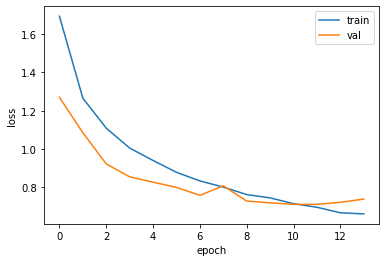

In [22]:
import matplotlib.pyplot as plt

def make_plot():
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'])
  plt.show()

make_plot()

In [23]:
cnn_model.evaluate(test_scaled, test_targets)

313/313 [==============================] - 1s 3ms/step - loss: 0.7432 - accuracy: 0.7472


[0.7431588172912598, 0.7472000122070312]

In [24]:
import numpy as np

predicted_result = cnn_model.predict(test_scaled)
predicted_result[:5]

array([[1.75803481e-03, 3.03636916e-04, 2.03381502e-03, 6.87871993e-01,
        1.65102232e-04, 3.02799076e-01, 1.65198406e-03, 1.72893133e-03,
        1.61071459e-03, 7.67790916e-05],
       [3.22289881e-04, 1.30341062e-03, 2.00625835e-10, 1.82132295e-10,
        1.36221373e-12, 2.73931550e-12, 8.45616546e-12, 2.88491460e-14,
        9.98373270e-01, 9.95939558e-07],
       [2.01424778e-01, 1.87367145e-02, 1.24383497e-03, 5.12136752e-03,
        1.84675853e-04, 1.02360806e-04, 7.17681542e-06, 5.69388503e-04,
        7.03792691e-01, 6.88170195e-02],
       [6.82244837e-01, 1.91316418e-02, 5.13037574e-03, 2.84098438e-04,
        5.58709653e-05, 8.14054602e-06, 1.23998063e-04, 3.09224191e-07,
        2.88699687e-01, 4.32108715e-03],
       [2.86648651e-06, 2.31077138e-06, 8.28100182e-03, 2.29486674e-02,
        2.70870477e-02, 6.81150646e-04, 9.40963328e-01, 5.35180925e-06,
        1.12803154e-05, 1.70387957e-05]], dtype=float32)

In [25]:
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:5]

array([3, 8, 8, 0, 6])

In [26]:
# 예측이 틀린 데이터 확인하기
wrong_result = []
for i in range(len(test_scaled)):
  if predicted_labels[i] != test_targets[i]:
    wrong_result.append(i)

print(len(wrong_result))

2528


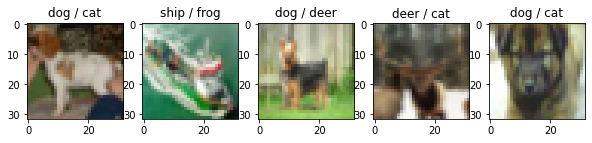

In [27]:
plt.figure(figsize=(10, 10))

for idx, wrong_idx in enumerate(wrong_result[:5]):
  plt.subplot(1, 5, idx+1)
  plt.imshow(test_images[wrong_idx])
  plt.title(class_names[test_targets[wrong_idx][0]] + ' / ' + class_names[predicted_labels[wrong_idx]])
plt.show()